Importing tools to do binary classification with logistic regression:

Logistic regression takes in any value and the output is always between 0 and 1. This is useful for our binary classification as we are sorting data into two groups. 

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

import statsmodels.api as sm

This logistic regression will be done using results from a 1970's survey of women about extramarital affairs. We will be trying to classify women into two groups, having participated in an affair or not, based on their responsed to other portions of the survey. 

In [3]:
# Loading data from statsmodels 
df = sm.datasets.fair.load_pandas().data

In [4]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [5]:
# To begin classifying, we must denote if a woman is part of the group having had an affair or not
def affair_check(x):
    if x !=0:
        return 1
    else:
        return 0

In [6]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [8]:
# Using groupby, you can group all women who had affair and those who did not. Then you can look at the averages for each attribute for the two groups
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


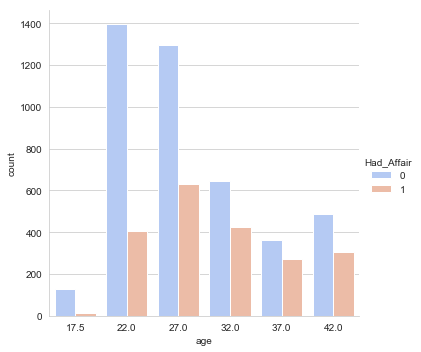

In [12]:
# Visualizing the age difference between the groups
sns.catplot('age',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

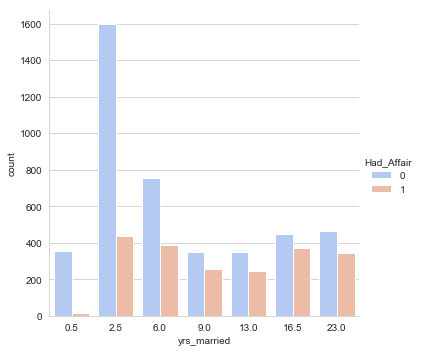

In [13]:
# Visualizing years married and the occurrence of an affair
sns.catplot('yrs_married',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

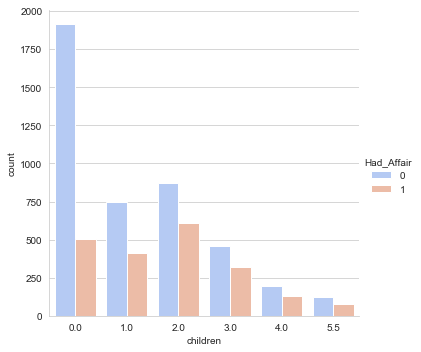

In [14]:
# Number of children and the occurrence of an affair
sns.catplot('children',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

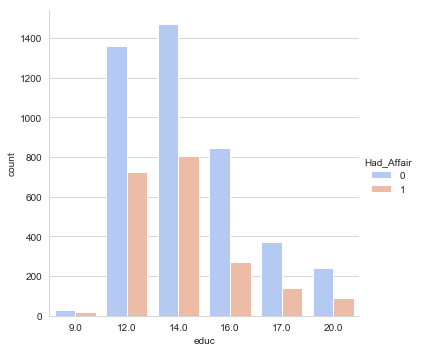

In [16]:
# Education and affair trends
sns.catplot('educ',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

In [17]:
# Creating dummy variables for the occupation columns since they are categorical. When we look at things like the averages above, the number does not make sense being in between categories.
occ_dummies = pd.get_dummies(df['occupation'])

In [18]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [19]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [20]:
# Getting rid of the numbers as the column names and making it something a little more useful and easy to read
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']


In [21]:
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [22]:
# Making X and Y datasets for the logistic regression 
# Dropping the columns that are unnecessary or misleading
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [23]:
# Concatenate the two dataframes for occupations
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [26]:
# We want the X to then include the occupational data from the dummy variable dataframe
X = pd.concat([X,dummies],axis=1)

In [27]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [29]:
# Y is the affair data from the original DataFrame
Y = df.Had_Affair

In [30]:
# Because of the dummy variables, we fall into the problem of multicollinearity, so we drop one column of occupation data from each of the dummy variable sets. 
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)
X = X.drop('affairs',axis=1)

In [31]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [32]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [33]:
# For scikit-learn, you need a 1D array
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0])

In [34]:
log_model = LogisticRegression()

# Fitting data to model
log_model.fit(X,Y)

# Checking the accuracy
log_model.score(X,Y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

In [35]:
# This is percentage of women that have had an affair
# This is known as the null error rate because if you always guessed no affair, then you would have 68% accuracy. 
Y.mean()

0.3224945020420987

In [37]:
# Checking coefficients of features to find the strongest predictors of an affair
coeff_df = DataFrame(list(zip(X.columns,np.transpose(log_model.coef_))))

In [38]:
coeff_df

,0,1
0,rate_marriage,[-0.697965769843304]
1,age,[-0.05638366623393984]
2,yrs_married,[0.1039333161707498]
3,children,[0.018151704110619376]
4,religious,[-0.36854158668373044]
5,educ,[0.008710487485413353]
6,occ2,[0.2980251967069891]
7,occ3,[0.6079813590701593]
8,occ4,[0.3463226954069793]
9,occ5,[0.9425837883823011]


In [39]:
# Using train,test,split method
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [40]:
log_model2 = LogisticRegression()

#Fitting the model with the training sets
log_model2.fit(X_train,Y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
# Get a prediction using the testing dataset
class_predict = log_model2.predict(X_test)

In [43]:
# Getting an accuracy score between 0 and 1. 1 would mean we had perfect accuracy
print(metrics.accuracy_score(Y_test,class_predict))

0.7273869346733668
